In [ ]:
import numpy as np
from packaging import version
import subprocess
import sys
# Following code required owing to the issue here https://github.com/h2oai/h2o-3/issues/16462 , once numpy 2 is supported the code can be removed
# Check if current NumPy is >= 2
if version.parse(np.__version__) >= version.parse("2.0"):
    print(f"Detected NumPy {np.__version__}, reinstalling < 2.0...")
    !pip install --force-reinstall --no-cache-dir "numpy<2"
    # Restart runtime manually
else:
    print(f"NumPy {np.__version__} is already < 2.0. No action needed.")


NumPy 1.26.4 is already < 2.0. No action needed.


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install h2o
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.6 MB/s eta 0:00:00


In [ ]:
import re

In [ ]:
import matplotlib.pyplot as plt
def save_classification_metrics_and_plots(model, data, save_path):
    """
    Save important classification metrics and plots to a file.

    Args:
        model (H2OModel): The classification model.
        data (H2OFrame): The dataset for evaluation.
        save_path (str): The directory path where metrics and plots will be saved.

    Returns:
        None
    """
    # Create a directory to save the files
    os.makedirs(save_path, exist_ok=True)

    # Compute confusion matrix using the perf object
    perf = model.model_performance(data)
    confusion = perf.confusion_matrix()

    with open(os.path.join(save_path, 'confusion_matrix.txt'), 'w') as confusion_file:
      confusion_file.write(str(confusion))

    # Save the confusion matrix as a CSV file
    #confusion.to_csv(os.path.join(save_path, 'confusion_matrix.csv'))

    # Save classification metrics to a text file
    with open(os.path.join(save_path, 'classification_metrics.txt'), 'w') as metrics_file:
        metrics_file.write(f"Accuracy: {perf.accuracy()}\n")
        metrics_file.write(f"Precision: {perf.precision()}\n")
        metrics_file.write(f"Recall: {perf.recall()}\n")
        metrics_file.write(f"F1 Score: {perf.F1()}\n")

    roc_curve_file = f"{save_path}/roc_curve.png"

    # Use the plot function with save_to_file parameter to save the plots to files
    perf.plot(type="roc", save_to_file=roc_curve_file)

    # Save AUC to a text file
    auc = perf.auc()
    with open(os.path.join(save_path, 'auc.txt'), 'w') as auc_file:
        auc_file.write(f"AUC: {auc}\n")



In [ ]:
import h2o
import pandas as pd
# helper function to format grid search results

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
def performance_table_class(models, train_data, valid_data):
    model_perf = []
    for model in models:
        model_id = model.model_id
        train_logloss = model.logloss(train = True)
        cv_logloss = model.logloss(xval = True)
        valid_logloss = model.logloss(valid = True)

        # Compute classification metrics for the validation data
        valid_performance = model.model_performance(valid_data)
        accuracy = valid_performance.accuracy()[0][1]
        f1_scores = valid_performance.F1()
        #weighted_f1 = sum([f1[1] * valid_data['pendency_model_multiyear'].table()['N'][i] for i, f1 in enumerate(f1_scores)])
        auc = valid_performance.auc()


        model_perf.append([model_id, train_logloss, cv_logloss, valid_logloss, accuracy, f1_scores , auc])


    model_perf_df = pd.DataFrame(model_perf, columns=["model", "train_logloss", "cv_logloss", "valid_logloss", "accuracy", "f1", "auc"])
    model_perf_df = model_perf_df.sort_values(by="valid_logloss")

    return model_perf_df



In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
h2o.init(max_mem_size = "45g")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt1fyxjz4
  JVM stdout: /tmp/tmpt1fyxjz4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt1fyxjz4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_0wio1i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,45 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/Model1cData_2010to2018_merged_criminal.csv')
#cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/automl_2010to2018_merged_all.csv')

Parse progress: |█████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'female_adv_def': 'int',
 'female_adv_pet': 'int',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'int',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'int',
 'muslim_adv_pet': 'int',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
#Remove all columns not available at time of case filing

# List of columns to keep
columns_to_keep = cases2010to2018_h2o.columns

columns_to_keep.remove("female_judge_decision")
columns_to_keep.remove("decision_judge_tenure_at_decision")
columns_to_keep.remove("pendency_first_filing")
columns_to_keep.remove("judgediff")
#Drop columns related to advocate and religion
columns_to_keep.remove("muslim_defendant")
columns_to_keep.remove("muslim_petitioner")
columns_to_keep.remove("muslim_adv_def")
columns_to_keep.remove("muslim_adv_pet")
columns_to_keep.remove("female_adv_def")
columns_to_keep.remove("female_adv_pet")

# Use the assign method to drop columns
cases2010to2018_h2o = cases2010to2018_h2o[columns_to_keep]


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o

state_code,female_defendant,female_petitioner,billable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,nan,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,nan,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
#TBD to be converted to embeddings
cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].asfactor()
#cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].ascharacter()

In [ ]:
# Change types
cases2010to2018_h2o['state_code'] = cases2010to2018_h2o['state_code'].asfactor()
cases2010to2018_h2o['female_defendant'] = cases2010to2018_h2o['female_defendant'].asfactor()


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'enum',
 'female_defendant': 'enum',
 'female_petitioner': 'enum',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'enum',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o.head()

state_code,female_defendant,female_petitioner,billable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
print(len(cases2010to2018_h2o))

22389955


In [ ]:
#change name of billable to bailable_IPC
new_column_name = "bailable_ipc"
old_column_name = "billable_ipc"

# Get the current column names as a list
column_names = cases2010to2018_h2o.columns

# Find the index of the column you want to rename
column_index = column_names.index(old_column_name)

# Replace the old column name with the new one
column_names[column_index] = new_column_name

# Set the new column names for the DataFrame
cases2010to2018_h2o.set_names(column_names)

state_code,female_defendant,female_petitioner,bailable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
from h2o.estimators import H2ORandomForestEstimator
import copy

In [ ]:
cases2010to2018_train, cases2010to2018_test, cases2010to2018_valid = cases2010to2018_h2o.split_frame(ratios=[.7, .15])

In [ ]:
y = "pendency_model_multiyear"
x = cases2010to2018_h2o.columns
x.remove(y)


In [ ]:
nfolds = 3
seed = 1234
search_criteria = {'seed': seed,'strategy': "RandomDiscrete", 'max_models': 2}

In [ ]:
default_drf_params = {
    'ntrees':50,
    'max_depth': 20,
    'min_rows': 1,
    'score_tree_interval': 5,
    'stopping_rounds': 3, # early stopping
    'col_sample_rate_per_tree': 1,
    'min_split_improvement' : 1e-05,
    'sample_rate':0.632,
    'stopping_metric':'logloss'
}

In [ ]:
best_guess_drfs = []
model_params = copy.deepcopy(default_drf_params)
drf = H2ORandomForestEstimator(nfolds=nfolds, seed=seed,**model_params)
drf.train(training_frame=cases2010to2018_train, validation_frame=cases2010to2018_valid, y=y, x=x)
best_guess_drfs = best_guess_drfs + [drf]

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.grid import H2OGridSearch

In [ ]:
drf_search_params = { 'ntrees': [50, 70],
                      'max_depth': [20, 30],
                      'sample_rate':[0.8]
                    }

In [ ]:
# remove parameters that are being searched from the default dictionary
for k in drf_search_params.keys():
    default_drf_params.pop(k, None)

In [ ]:
drf_grid = H2OGridSearch(model=H2ORandomForestEstimator,
                         grid_id='drf_grid',
                         search_criteria=search_criteria,
                         hyper_params=drf_search_params)
drf_grid.train(x=x, y=y,
               training_frame=cases2010to2018_train,
               validation_frame=cases2010to2018_valid,
               nfolds=nfolds,
               seed=seed,
               **default_drf_params)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,sample_rate,model_ids,logloss
,30.0,50.0,0.8,drf_grid_model_1,0.3906408
,20.0,26.0,0.8,drf_grid_model_2,0.4023297


In [ ]:
all_drf_models = best_guess_drfs + [h2o.get_model(id) for id in drf_grid.get_grid().model_ids]



In [ ]:
output_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
os.makedirs(output_directory, exist_ok=True)

save_path = "/content/drive/MyDrive/Law/criminalall-used/saved_models/"
os.makedirs(save_path, exist_ok=True)

In [ ]:
drf_perf = performance_table_class(all_drf_models,cases2010to2018_train,cases2010to2018_valid)
drf_perf.to_csv('/content/drive/MyDrive/Law/criminalall-used/model_performance.csv', index=False)

In [ ]:
drf_perf

,model,train_logloss,cv_logloss,valid_logloss,accuracy,f1,auc
1,drf_grid_model_1,0.402786,0.390641,0.386486,0.814785,"[[0.4229818251802256, 0.8481751252758555]]",0.901191
2,drf_grid_model_2,0.416194,0.402330,0.401113,0.807391,"[[0.4256101943273211, 0.8421888923022323]]",0.894401
0,DRF_model_python_1754323661983_1,0.405220,0.402390,0.402304,0.807039,"[[0.429984823534788, 0.8413308676125504]]",0.893795


In [ ]:
best_model = h2o.get_model(drf_perf.iloc[0, 0])

In [ ]:
# View the parameters for the XGBoost model selected above
best_model.params.keys()

print(best_model.params.keys())

# Inspect individual parameter values
print(best_model.params['ntrees'])
print(best_model.params['max_depth'])
print(best_model.params['min_rows'])
print(best_model.params['score_tree_interval'])
print(best_model.params['stopping_rounds'])
print(best_model.params['col_sample_rate_per_tree'])
print(best_model.params['min_split_improvement'])
print(best_model.params['sample_rate'])
print(best_model.params['stopping_metric'])
print(best_model.params['stopping_tolerance'])

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'mtries', 'sample_rate', 'sample_rate_per_class', 'binomial_double_trees', 'checkpoint', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'categorical_encoding', 'calibrate_model', 'calibration_frame', 'calibration_method', 'distribution', 'custom_metric_func', 'export_checkpoints_d

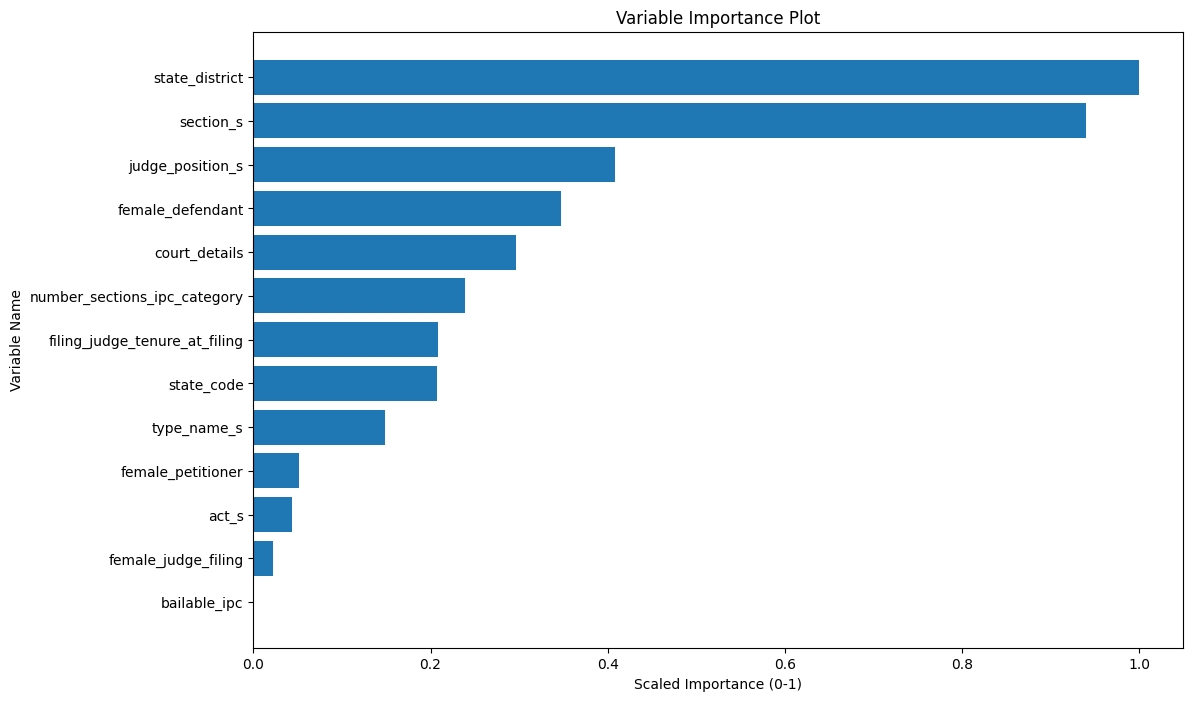

In [ ]:
# Get variable importance scores for all variables
varimp = best_model.varimp(use_pandas=True)
from sklearn.preprocessing import MinMaxScaler

# Sort the DataFrame by relative variable importance in descending order
varimp = varimp.sort_values(by='relative_importance', ascending=True)

# Min-Max scaling
scaler = MinMaxScaler()
varimp['scaled_importance'] = scaler.fit_transform(varimp[['relative_importance']])

# Create a bar plot for all variables and their importance scores
plt.figure(figsize=(12, 8))
plt.barh(varimp['variable'], varimp['scaled_importance'])
plt.xlabel('Scaled Importance (0-1)')
plt.ylabel('Variable Name')
plt.title('Variable Importance Plot')

# Save the plot to a file
plt.savefig('/content/drive/MyDrive/Law/criminalall-used/variable_importance_plot.png')

plt.show()


/tmp/ipython-input-1985844485.py:37: H2ODeprecationWarning: ``save_to_file`` param of ``H2OBinomialModelMetrics.plot`` is deprecated, please use ``save_plot_path`` instead.
  perf.plot(type="roc", save_to_file=roc_curve_file)


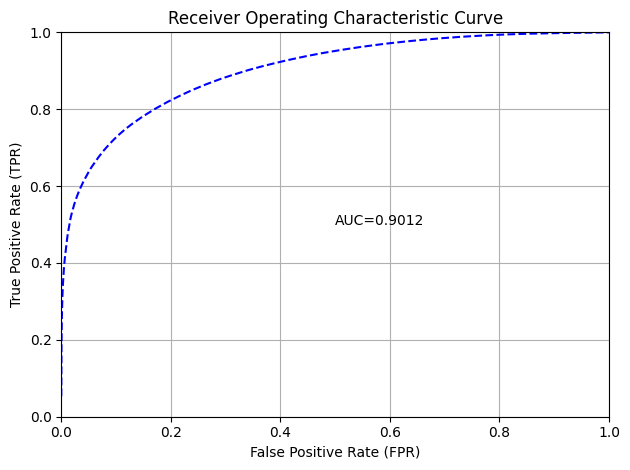

'/content/drive/MyDrive/Law/criminalall-used/saved_models/drf_grid_model_1.zip'

In [ ]:

# Call the function to save metrics and plots for the current model
save_classification_metrics_and_plots(best_model,cases2010to2018_test, output_directory)
best_model.save_mojo(path=save_path)


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## drf_grid_model_1

,delayed,ontime,Error,Rate
delayed,949803.0,391887.0,0.2921,(391887.0/1341690.0)
ontime,243236.0,1773776.0,0.1206,(243236.0/2017012.0)
Total,1193039.0,2165663.0,0.1891,(635123.0/3358702.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

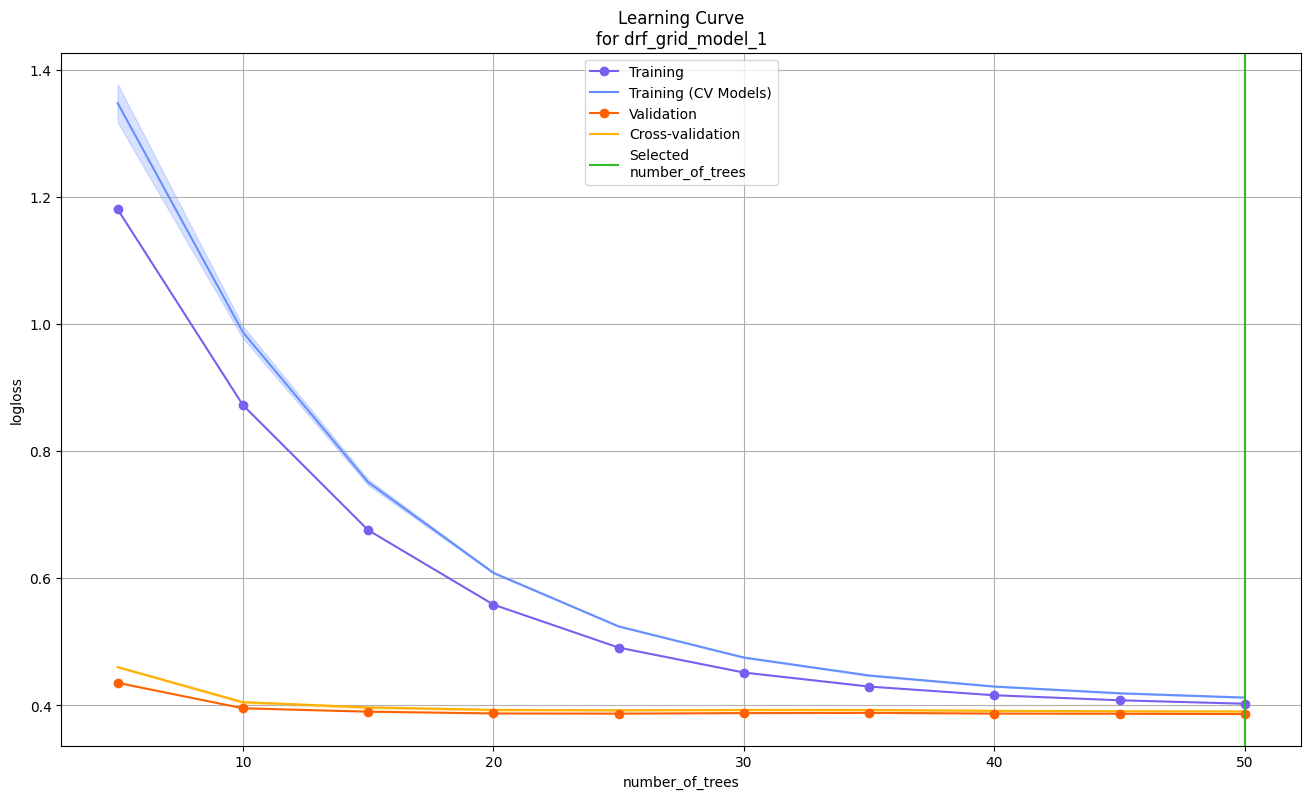

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

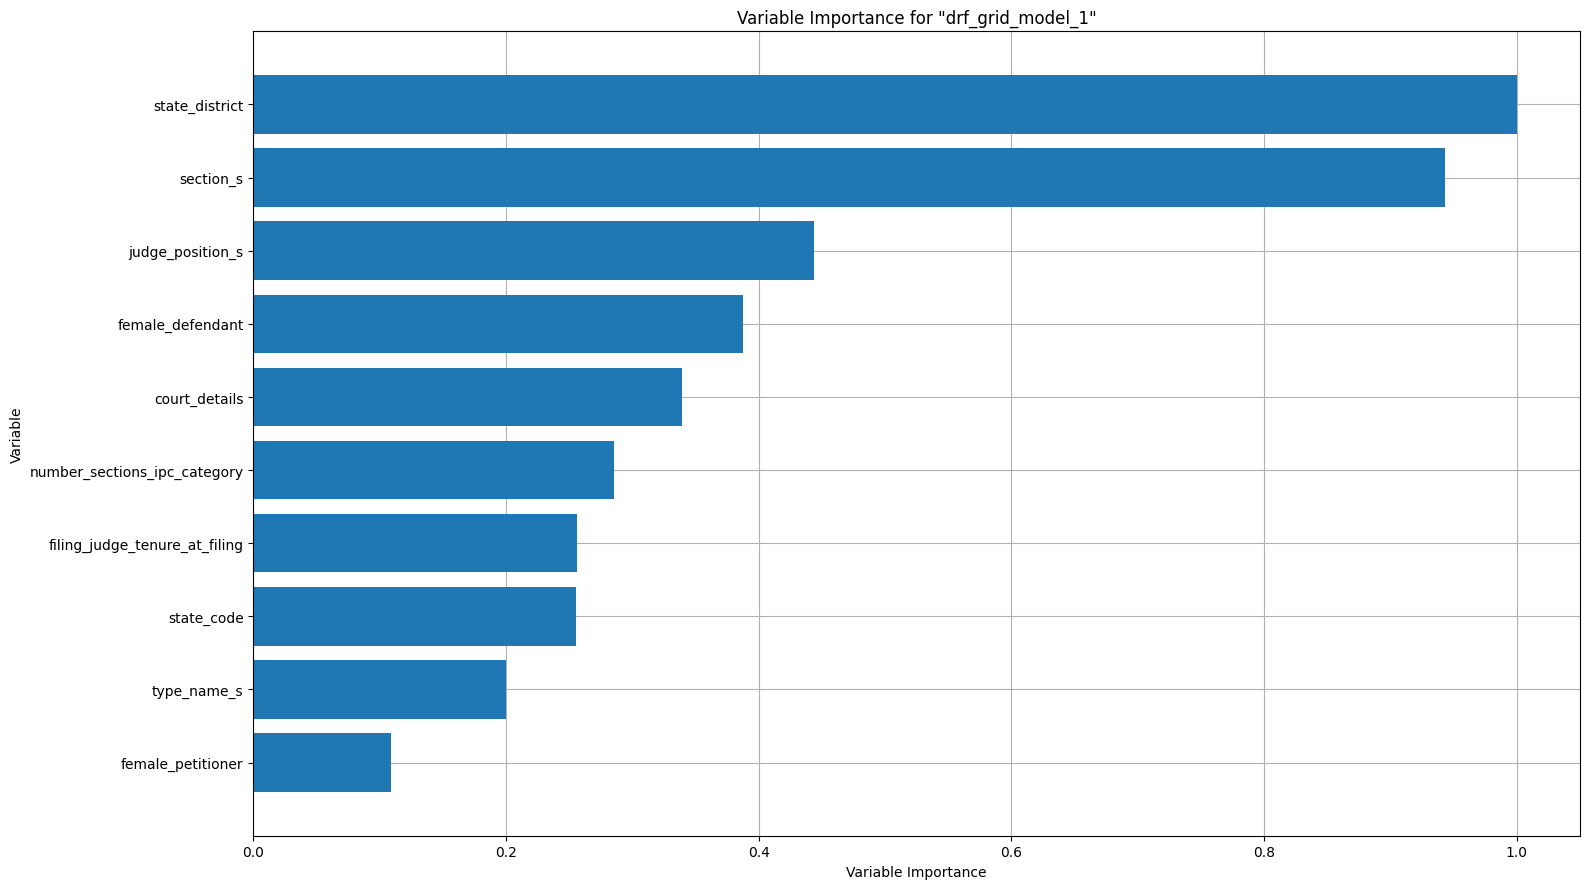

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

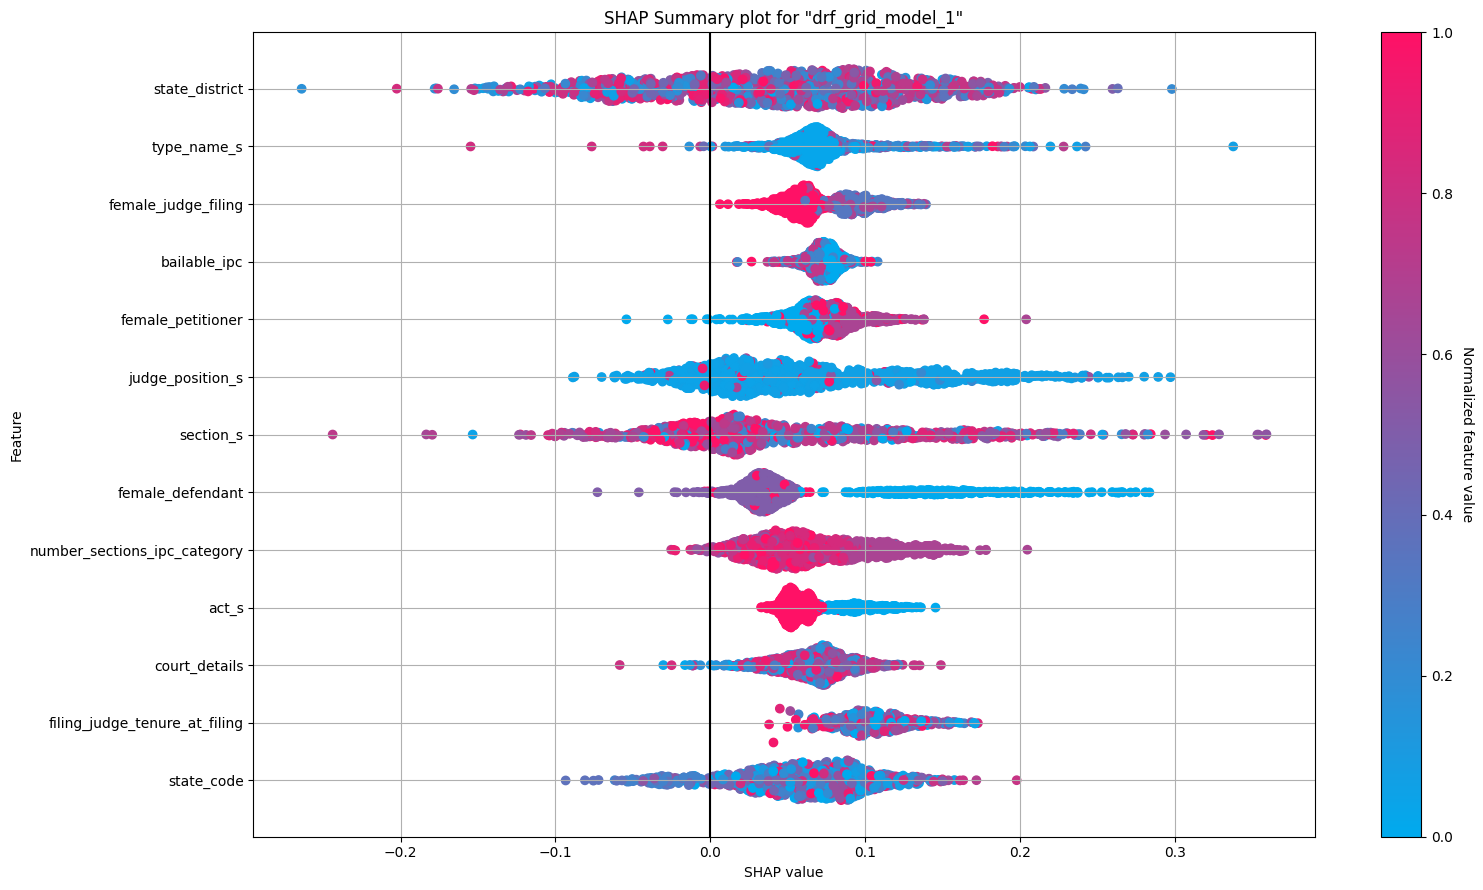

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

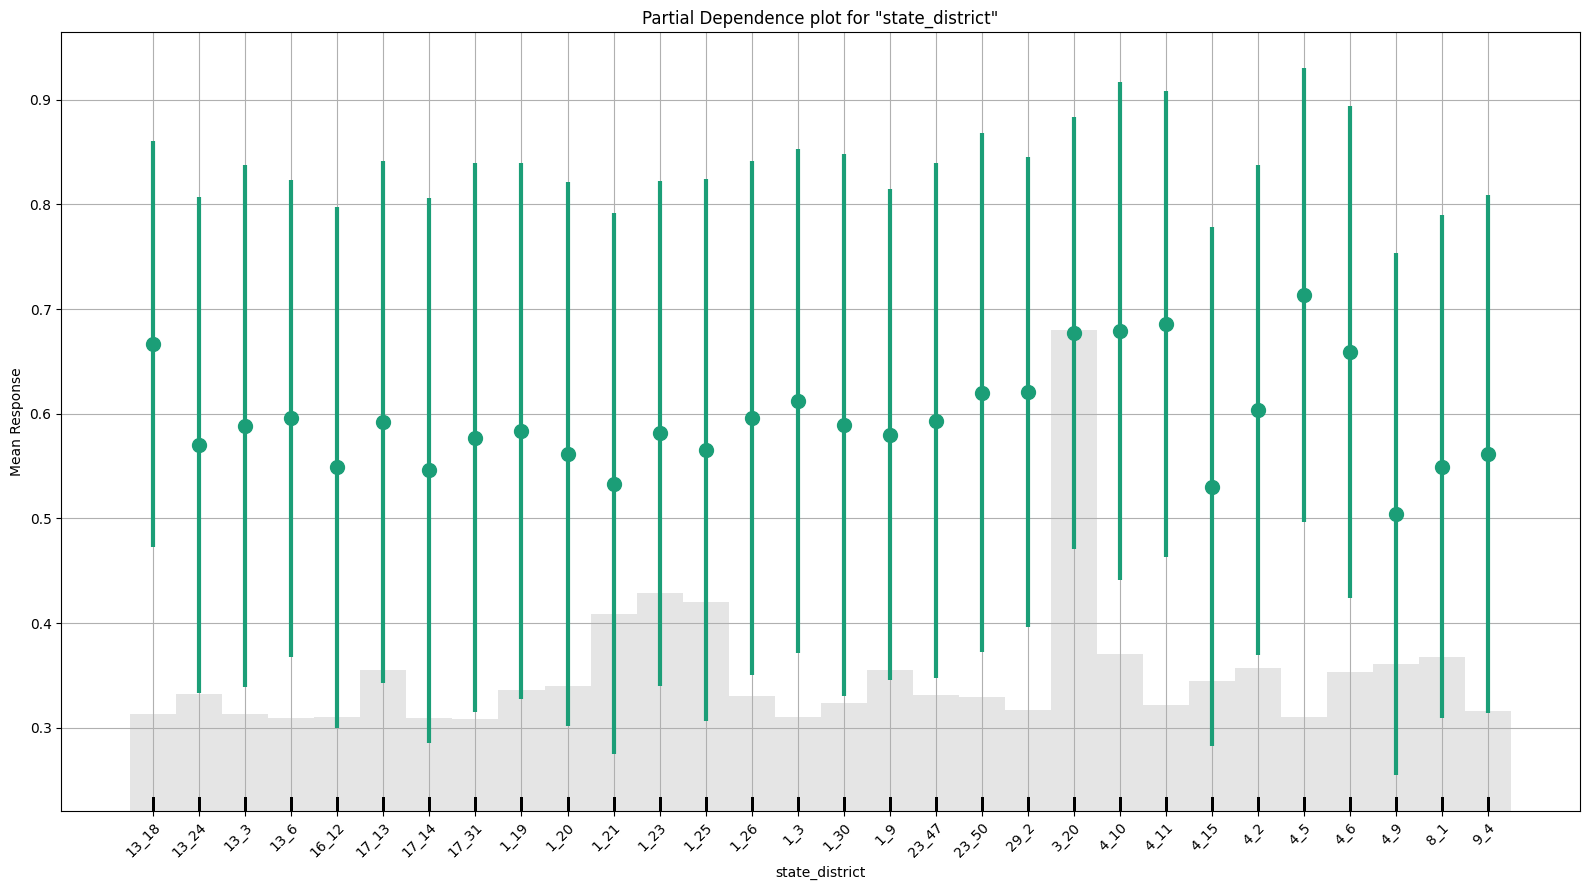

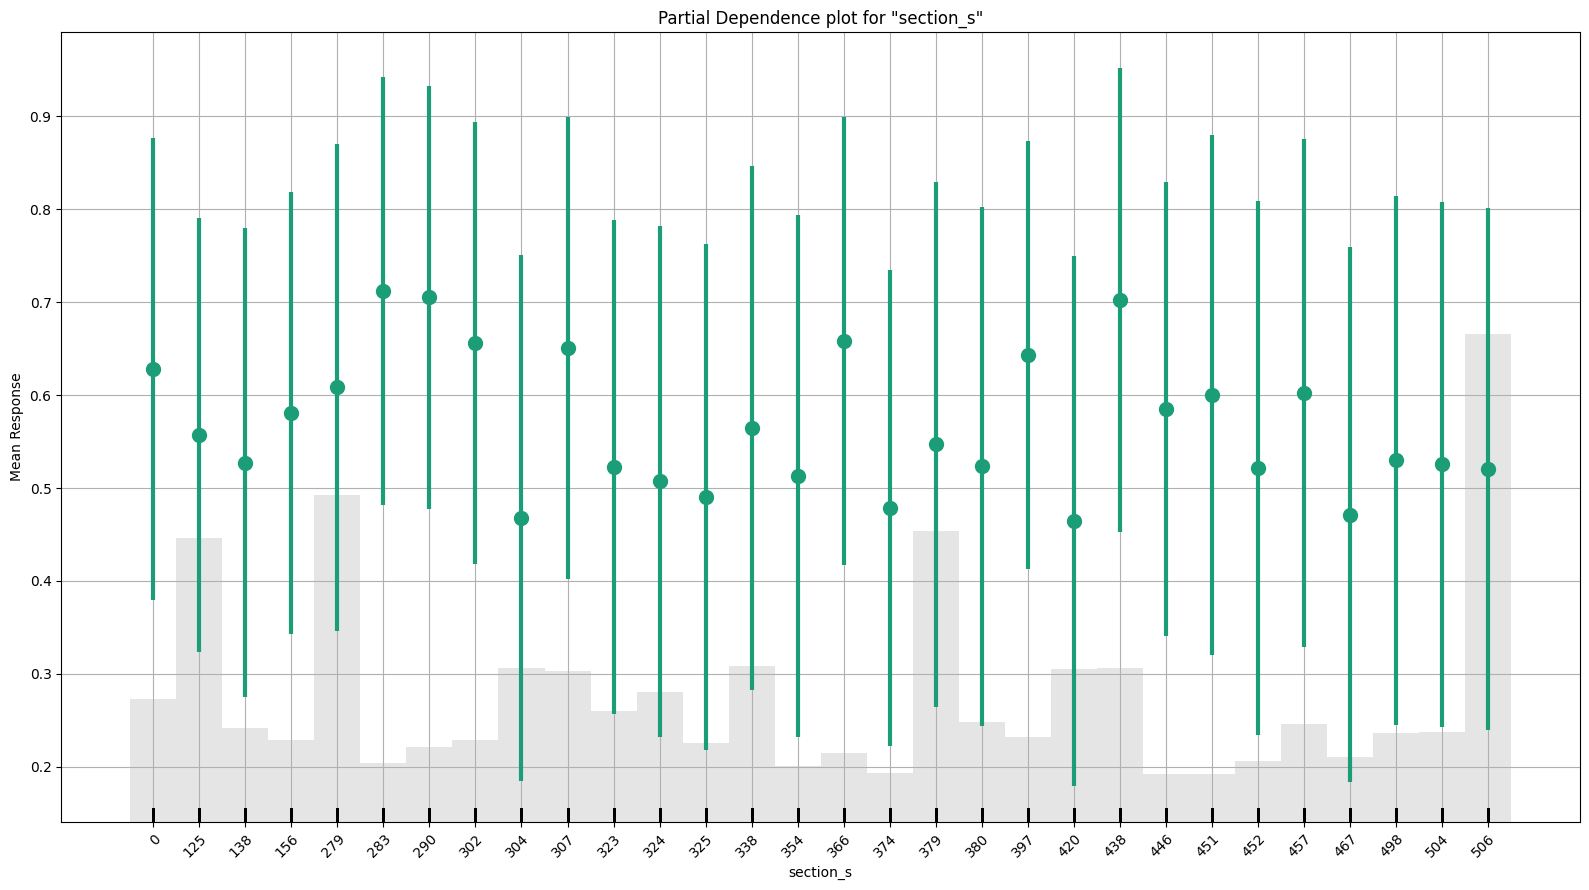

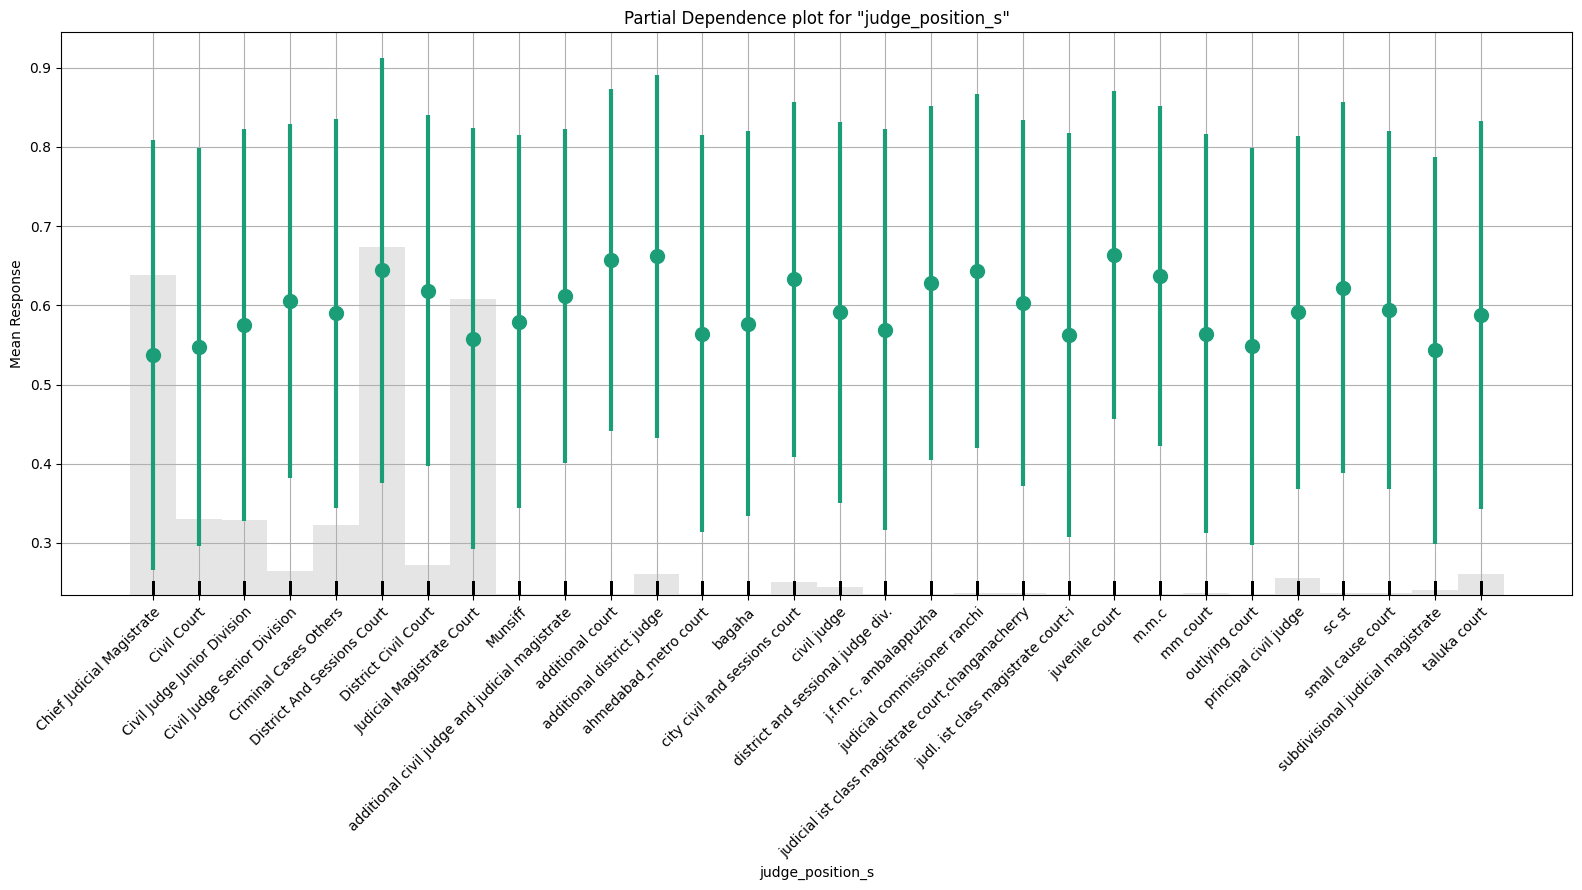

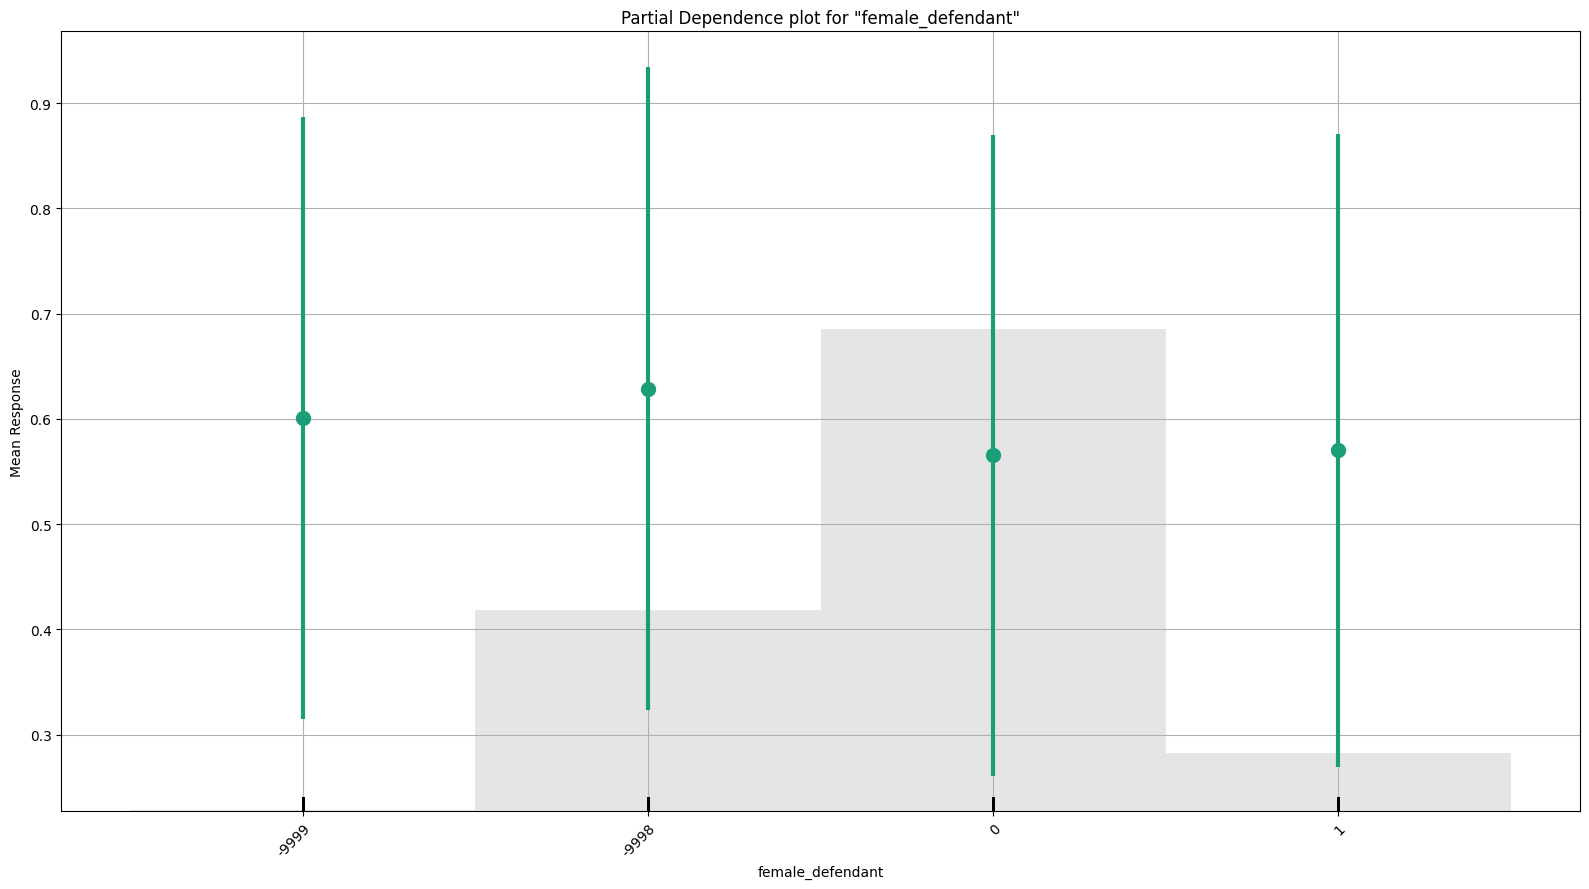

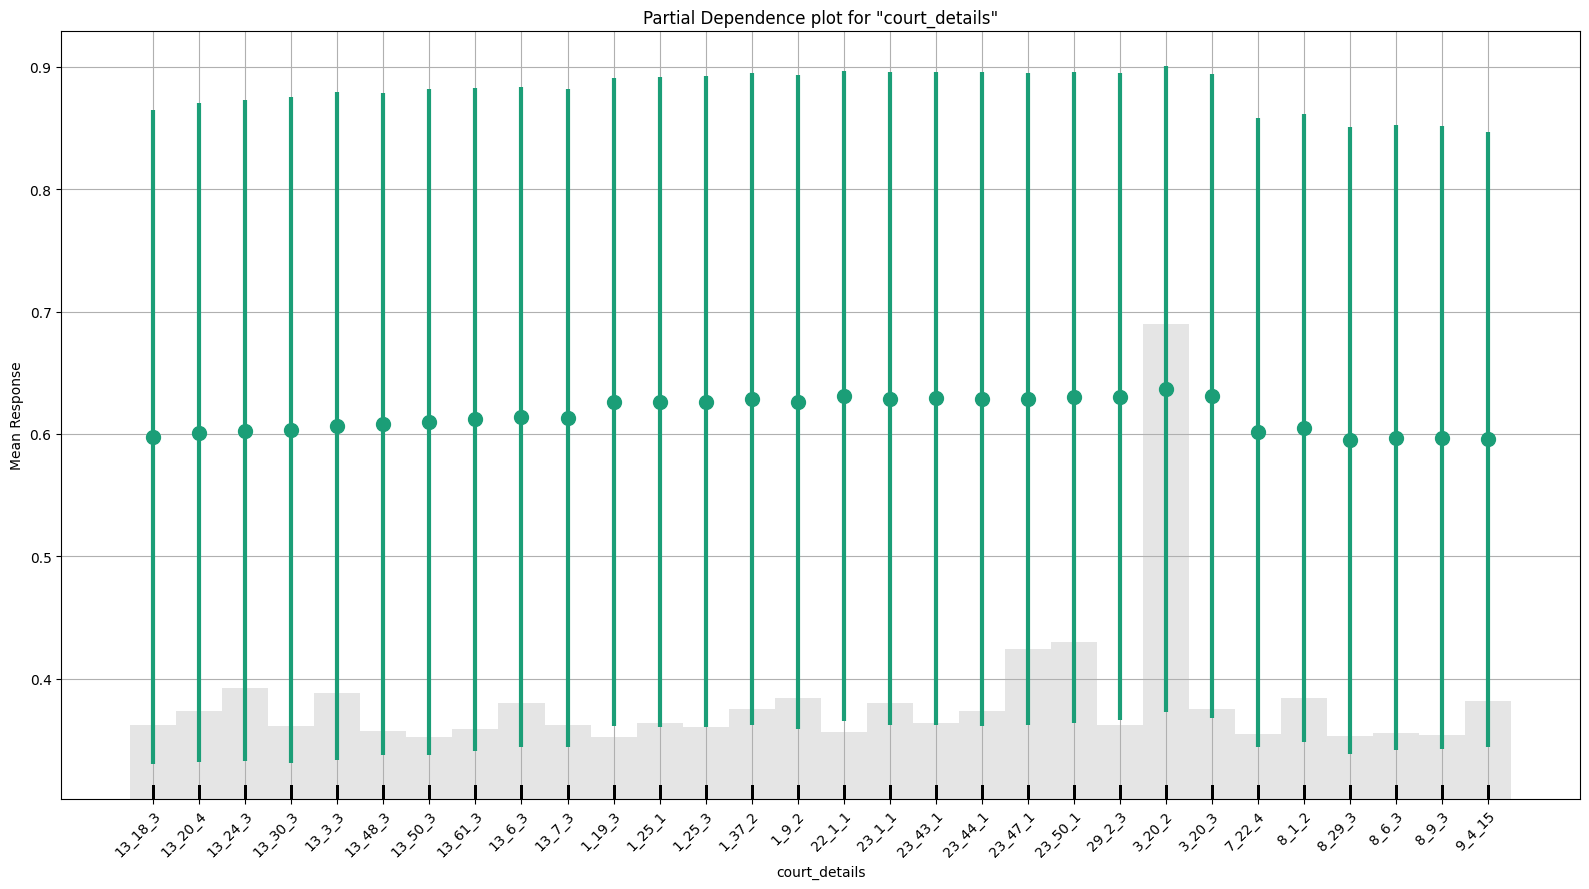

In [ ]:
explanations = best_model.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

In [ ]:
explanations = best_model.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

In [ ]:
shap_plot = best_model.shap_summary_plot(cases2010to2018_test)

In [ ]:
pd_plot = best_model.pd_plot(cases2010to2018_test, "female_defendant")

In [ ]:
pd_plot1 = best_model.pd_plot(cases2010to2018_test, "filing_judge_tenure_at_filing")

In [ ]:
pd_plot2 = best_model.pd_plot(cases2010to2018_test, "section_s")

In [ ]:
pd_plot3 = best_model.pd_plot(cases2010to2018_test, "state_district")

In [ ]:
pd_plot4 = best_model.pd_plot(cases2010to2018_test, "judge_position_s")

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
columns = ["number_sections_ipc_category", "female_defendant" ,"filing_judge_tenure_at_filing" , "female_petitioner", "bailable_ipc", "female_judge_filing", "act_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

    # Save the plot to an image file based on the column name
    #plot_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.png")
    #plt.savefig(plot_file_path)

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
columns = ["female_defendant"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

    # Save the plot to an image file based on the column name
    plot_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.png")
    plt.savefig(plot_file_path)

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used/performance"
columns = ["filing_judge_tenure_at_filing", "section_s", "state_district", "judge_position_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

In [ ]:
import random

explanations_dir = "/content/drive/MyDrive/Law/criminalall-used/explanation_ind_plots"
os.makedirs(explanations_dir, exist_ok=True)


num_rows_to_explain = 10
random_indices = random.sample(range(cases2010to2018_test.nrow), num_rows_to_explain)
table_data = []

def save_plots_row(plot_data,plots_dir, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots_row(value, plots_dir, parent_key=f"{parent_key}_{key}")

# Explain each of the selected rows and save the explanations
for row_index in random_indices:
    print(row_index)
    # explanation = best_model.explain_row(cases2010to2018_test, row_index)
    # Retrieve the actual values and model predictions

    # Call the function to save plots
    #save_plots_row(explanation,explanations_dir, row_index)
    actual_value = cases2010to2018_test[row_index, 'pendency_model_multiyear']
    #model_prediction = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame().iloc[0, 0]

    # Append the details to the table_data list
    #table_data.append({'Serial Number': row_index, 'Original': actual_value, 'Model Prediction': model_prediction})

        # Prediction and probabilities
    model_prediction_df = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame()
    label = model_prediction_df['predict'].iloc[0]
    probability = model_prediction_df[label].iloc[0]  # Probability of the predicted label

    # Append the details to the table_data list
    table_data.append({
        'Serial Number': row_index,
        'Original': actual_value,
        'Model Prediction Label': label,
        'Model Prediction Probability': probability
    })

# Create a DataFrame from the list
results_table = pd.DataFrame(table_data)

# Print or save the table as needed
print(results_table)
# Optionally save the table to a CSV file
table_filename = f"{explanations_dir}/randompredictions.csv"
results_table.to_csv(table_filename, index=False)